# Multi control bloq via single control bloq and `And` ladder

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `ControlledViaAnd`
Reduces a generic controlled bloq to a singly-controlled bloq using an And ladder.

Implements a generic controlled version of the subbloq, by first reducing the
arbitrary control to a single qubit, and then using a single-qubit-controlled
variant of the subbloq.

For signature, see :class:`Controlled`.

#### Parameters
 - `subbloq`: The bloq we are controlling.
 - `ctrl_spec`: The specification for how to control the bloq.


In [2]:
from qualtran.bloqs.mcmt import ControlledViaAnd

### Example Instances

In [3]:
from qualtran import CtrlSpec, QInt, QUInt
from qualtran.bloqs.basic_gates import Hadamard

controlled_via_and_ints = ControlledViaAnd(
    Hadamard(),
    CtrlSpec(
        qdtypes=(QUInt(4), QInt(4)), cvs=(np.array([0, 1, 2, 3]), np.array([0, 1, -1, -2]))
    ),
)

In [4]:
from qualtran.bloqs.basic_gates import Hadamard

controlled_via_and_qbits = ControlledViaAnd(Hadamard(), CtrlSpec(cvs=(np.array([0, 1, 1, 0]),)))

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([controlled_via_and_ints, controlled_via_and_qbits],
           ['`controlled_via_and_ints`', '`controlled_via_and_qbits`'])

### Call Graph

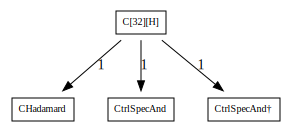

#### Counts totals:
 - `CHadamard`: 1
 - `CtrlSpecAnd`: 1
 - `CtrlSpecAnd†`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
controlled_via_and_ints_g, controlled_via_and_ints_sigma = controlled_via_and_ints.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(controlled_via_and_ints_g)
show_counts_sigma(controlled_via_and_ints_sigma)

## Nested Controls
Calling `controlled` on a `ControlledViaAnd` returns another `ControlledViaAnd` by combining the existing and new controls into a single control specification.

In [7]:
nested_ctrl_bloq = controlled_via_and_qbits.controlled(CtrlSpec(cvs=[1, 1]))
show_bloqs([nested_ctrl_bloq])

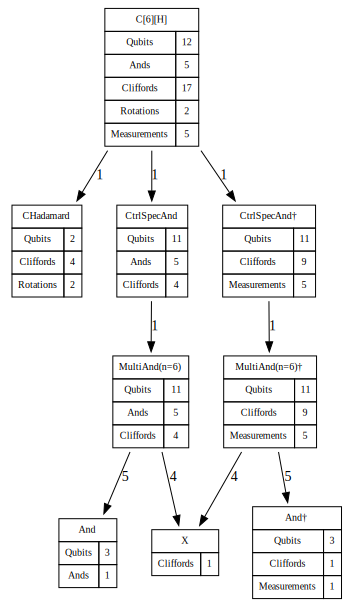

In [8]:
show_call_graph(nested_ctrl_bloq)